In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline
candy = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv",)
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
candy.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

In [6]:
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [7]:
candy.shape

(85, 13)

In [9]:
def lr():
    total = candy.isnull().sum().sort_values(ascending=False)
    percent = (candy.isnull().sum()/candy.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.head(20)
    miss = print(missing_data)
    return miss
lr()

                  Total  Percent
winpercent            0      0.0
pricepercent          0      0.0
sugarpercent          0      0.0
pluribus              0      0.0
bar                   0      0.0
hard                  0      0.0
crispedricewafer      0      0.0
nougat                0      0.0
peanutyalmondy        0      0.0
caramel               0      0.0
fruity                0      0.0
chocolate             0      0.0
competitorname        0      0.0


In [13]:
candy.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [28]:
candy.winpercent.unique()

array([66.971725, 67.602936, 32.261086, 46.116505, 52.341465, 50.347546,
       56.914547, 23.417824, 38.010963, 34.517681, 38.975037, 36.017628,
       24.524988, 42.272076, 39.460556, 43.088924, 39.185505, 46.783348,
       57.11974 , 34.158958, 51.41243 , 42.178772, 55.375454, 62.284481,
       56.490501, 59.236122, 28.127439, 57.21925 , 76.7686  , 41.389557,
       39.141056, 52.911392, 71.46505 , 66.574585, 46.411716, 55.064072,
       73.099556, 60.800701, 64.35334 , 47.829754, 54.526451, 55.354046,
       70.735641, 66.47068 , 22.445341, 39.4468  , 46.296597, 69.483788,
       37.722336, 41.265511, 37.348522, 81.866257, 84.18029 , 73.43499 ,
       72.887901, 35.290756, 65.716286, 29.703691, 42.849144, 34.722   ,
       63.08514 , 55.103695, 37.887188, 45.995827, 76.673782, 59.529251,
       59.863998, 52.825947, 67.037628, 34.578991, 33.43755 , 32.230995,
       27.303865, 54.861111, 48.982651, 43.068897, 45.736748, 49.653503,
       47.173229, 81.642914, 45.466282, 39.011898, 

Text(0.5, 1.0, 'Pair Plot')

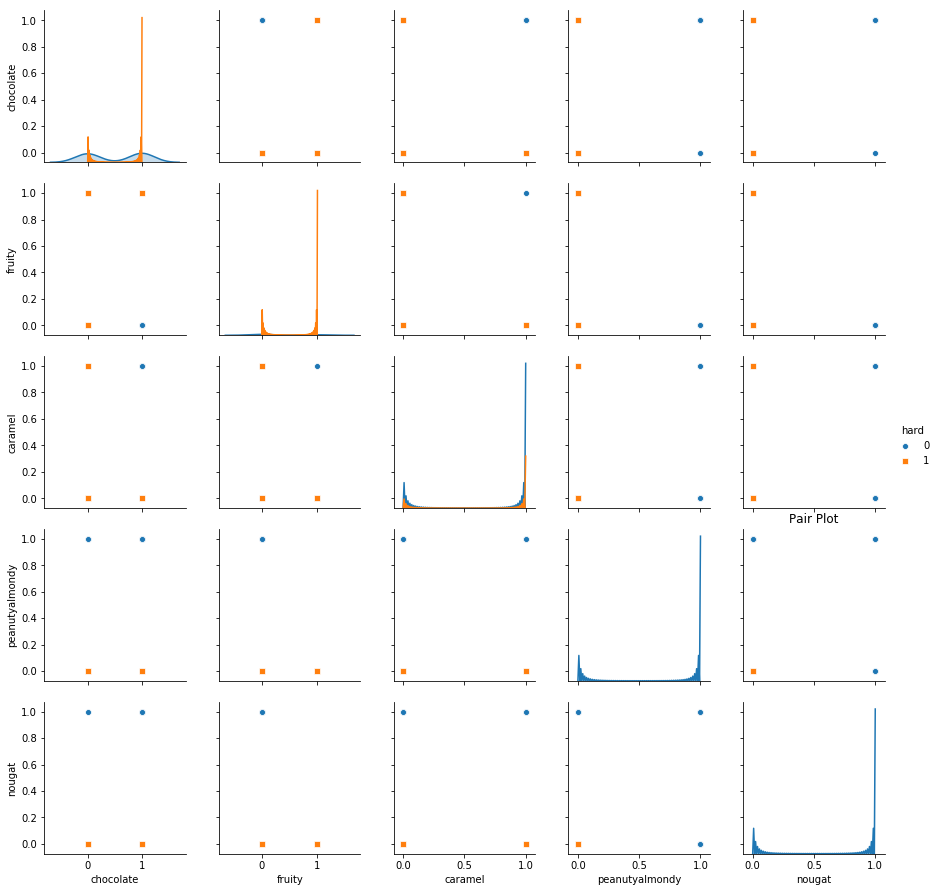

In [32]:
sns.pairplot(candy[["chocolate","fruity","caramel",'peanutyalmondy','nougat',"hard"]],
             vars = ["chocolate","fruity","caramel",'peanutyalmondy','nougat'],
             hue="hard", 
             dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

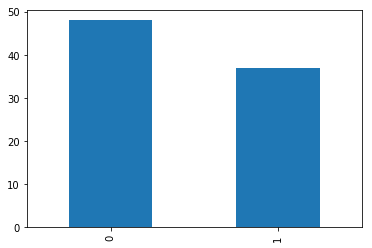

In [36]:
candy['chocolate'].value_counts().sort_index().plot.bar()

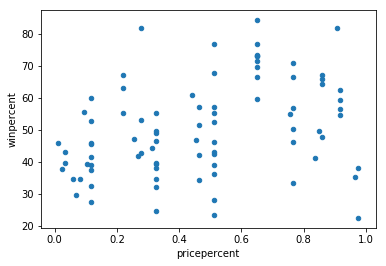

In [37]:
candy[['pricepercent','winpercent']].plot.scatter(x='pricepercent', y='winpercent')

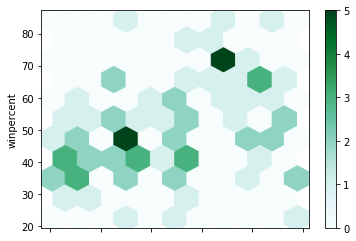

In [39]:
candy.plot.hexbin(x='pricepercent', y='winpercent', gridsize=10)

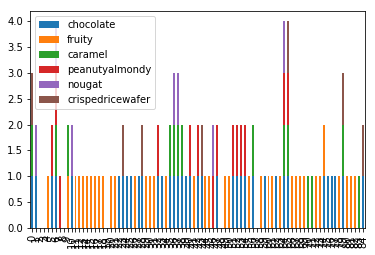

In [40]:
candy[['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer']].plot.bar(stacked=True)

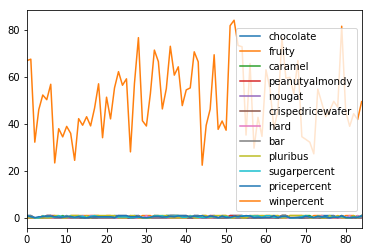

In [42]:
candy.plot.line()

Text(0.5, 1.0, 'Correlation between features')

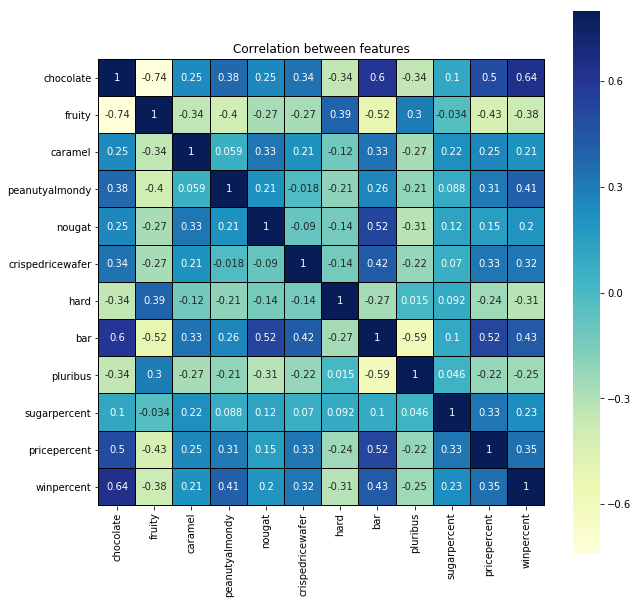

In [45]:
corr = candy.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [46]:
candy = candy.drop(['competitorname'], axis = 1)
candy.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [47]:
X = candy.loc[:,candy.columns != 'hard']
X.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0.906,0.511,52.341465


In [51]:
y = candy.hard
y.head()
y.unique()

array([0, 1], dtype=int64)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (68, 11)
y_train shape:  (68,)

Test cases as below
X_test shape:  (17, 11)
y_test shape:  (17,)


In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_pred_train = logreg.predict(X_train)  

In [55]:
y_pred_test = logreg.predict(X_test) 

In [56]:
#MODEL EVALUATION
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.8235294117647058


In [57]:
#confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

    0  1
0  14  0
1   3  0


This means 14 correct predicytions and 3 false predications

In [58]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.8235294117647058


In [59]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 0.8235294117647058


In [5]:
candy.crispedricewafer.value_counts()

0    78
1     7
Name: crispedricewafer, dtype: int64